# ***ВЫПУСКНАЯ КВАЛИФИКАЦИОННАЯ РАБОТА***

# ***Загрузка данных***

In [23]:
import csv
import pandas as pd
import numpy as np
import sklearn
from google.colab import files
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [59]:
uploaded = files.upload()

Saving X_bp.xlsx to X_bp.xlsx


In [60]:
X_bp = 'X_bp.xlsl'

In [61]:
df0 = pd.read_excel('X_bp.xlsx')
df0.to_csv('X_bp.csv')

In [62]:
uploaded = files.upload()

Saving X_nup.xlsx to X_nup.xlsx


In [63]:
X_nup = 'X_nup.xlsl'
df1 = pd.read_excel('X_nup.xlsx')
df1.to_csv('X_nup.csv')

***АНАЛИТИЧЕСКИЙ И РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ***

In [64]:
#УДАЛЕНИЕ ДУПЛИКАТОВ И СТОЛБЦОВ С ЕДИНСТВЕННЫМ ЗНАЧЕНИЕМ
df0.drop_duplicates(inplace=True)

df0 = df0[[c for c
           in list(df0)
           if len(df0[c].unique()) > 1]]

In [65]:
df1.drop_duplicates(inplace=True)

In [66]:
df1 = df1[[c for c
           in list(df1)
           if len(df1[c].unique()) > 1]]

In [67]:
#ПОИСК ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
df1.isnull().sum()

Unnamed: 0            0
Угол нашивки, град    0
Шаг нашивки           0
Плотность нашивки     0
dtype: int64

In [68]:
#АНАЛИЗ ДАННЫХ df0
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

In [78]:
df0 = df0.drop(columns=df0.columns[0])

In [79]:
#АНАЛИЗ ДАННЫХ df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 72.9 KB


In [72]:
#ОБЪЕДИНЕНИЕ ДАННЫХ В ОДИН ДАТАСЕТ
df = pd.concat([df0, df1], axis=1, join="inner")

In [74]:
#НАИМЕНОВАНИЕ КОЛОНОК
df = df[['Плотность, кг/м3',	'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Температура вспышки, С_2',	'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',	'Угол нашивки, град',	'Шаг нашивки',	'Плотность нашивки', 'Соотношение матрица-наполнитель', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]

In [81]:
#ТОЧНЫЙ АНАЛИЗ ДАННЫХ
df.describe()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,218.423144,44.252199,6.899222,57.153929,2.930366,73.328571,2466.922843
std,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,59.735931,45.015793,2.563467,12.350969,0.913222,3.118983,485.628006
min,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,33.803026,0.000000,0.000000,0.000000,0.389403,64.054061,1036.856605
25%,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,179.627520,0.000000,5.080033,49.799212,2.317887,71.245018,2135.850448
50%,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,219.198882,0.000000,6.916144,57.341920,2.906878,73.268805,2459.524526
75%,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,257.481724,90.000000,8.586293,64.944961,3.552660,75.356612,2767.193119
max,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,414.590628,90.000000,14.440522,103.988901,5.591742,82.682051,3848.436732


In [ ]:
#ОЧИЩАЮ ДАТАСЕТ ОТ ОШИБОЧНЫХ ПОКАЗАНИЙ

In [84]:
df_new = df[df['Поверхностная плотность, г/м2'] >= 200]

In [85]:
df_new = df_new[df_new['модуль упругости, ГПа'] >= 100]

In [86]:
df_new = df_new[df_new['Плотность нашивки'] >= 1]

In [87]:
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()

In [88]:
#преобразую угол нашивки
df_new.loc[:, 'Угол нашивки, град'] = labelencoder.fit_transform(df_new.loc[:, 'Угол нашивки, град'])

In [89]:
#удаляю температуру
df_new2 = df_new.drop('Температура вспышки, С_2', axis=1)

<Axes: title={'center': 'Корреляция свойств по Пирсону'}>

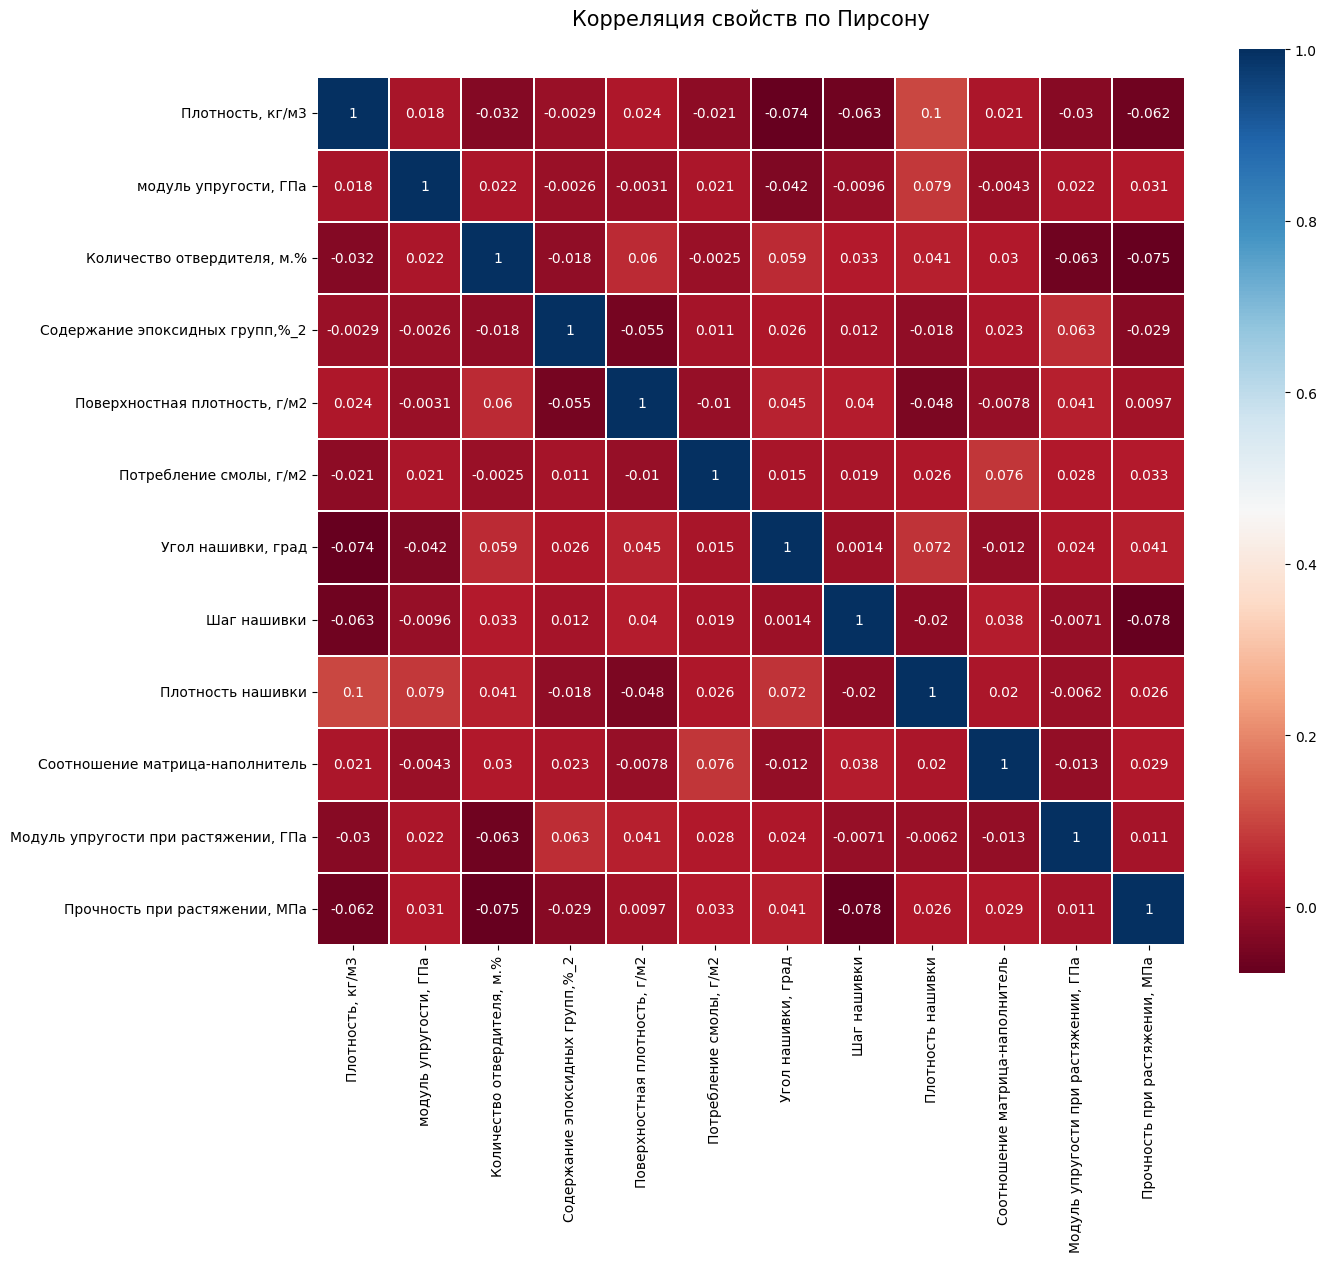

In [91]:
#СМОТРЮ КОРРЕЛЯЦИИ МЕЖДУ ПРИЗНКАМИ
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Корреляция свойств по Пирсону', y=1.05, size=15)
sns.heatmap(df_new2.corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

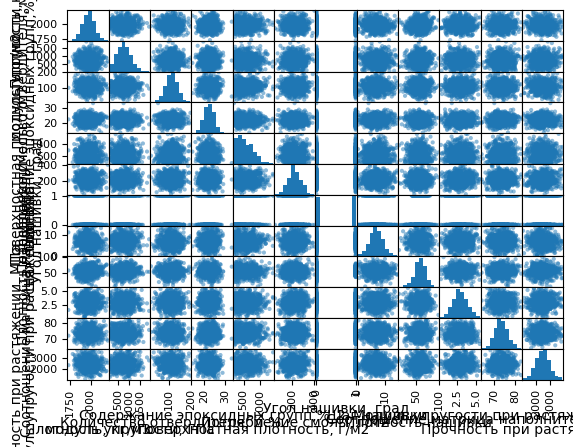

In [92]:
#СТРОИЮ МАТРИЦУ РАССЕЯНИЯ
scatter_matrix(df_new2)
pyplot.show()

<Axes: xlabel='Плотность, кг/м3', ylabel='Прочность при растяжении, МПа'>

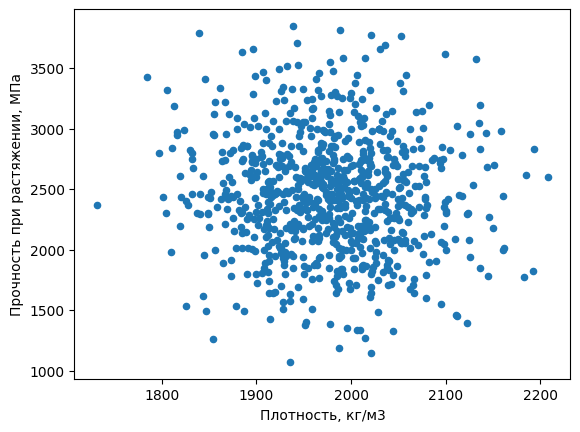

In [93]:
#ПОПАРНЫЕ ГРАФИКИ РАССЕЯНИЯ
df_new2.plot.scatter(x = 'Плотность, кг/м3', y = 'Прочность при растяжении, МПа')
#'Плотность, кг/м3',	'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Температура вспышки, С_2',	'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',	'Угол нашивки, град',	'Шаг нашивки',	'Плотность нашивки', 'Соотношение матрица-наполнитель', 'Модуль упругости при растяжении, ГПа', Прочность при растяжении, МПа

***ПОИСК УДАЛЕНИЕ ВЫБРОСОВ***

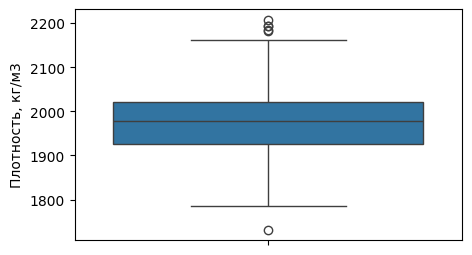

In [99]:
#ПОИСК ВЫБРОСОВ. ЯЩИК С УСАМИ
plt.figure(figsize=(5, 3))
sns.boxplot(df_new2['Плотность, кг/м3'])
plt.show()

In [100]:
def plot_scatter(x, y, title, xlabel, ylabel, c="b"):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x, y, c=c)
    plt.show()

In [101]:
plotnost_25 = df_new2["Плотность, кг/м3"].quantile(0.25)
plotnost_75 = df_new2["Плотность, кг/м3"].quantile(0.75)

In [102]:
plotnost_25

1926.51348879753

In [ ]:
plotnost_75

In [103]:
plotnost = plotnost_75 - plotnost_25
plotnost

95.21146625005508

In [104]:
lower_bound = plotnost_25 - 1.5 * plotnost
upper_bound = plotnost_75 + 1.5 * plotnost

In [105]:
lower_bound

1783.6962894224475

In [106]:
upper_bound

2164.542154422668

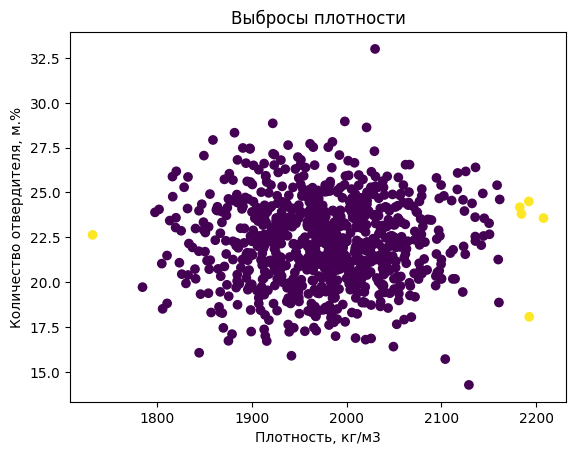

In [107]:
col = (df_new2["Плотность, кг/м3"] <= lower_bound) | (df_new2["Плотность, кг/м3"] >= upper_bound)

plot_scatter(df_new2["Плотность, кг/м3"], df_new2["Содержание эпоксидных групп,%_2"],
             "Выбросы плотности", "Плотность, кг/м3", "Количество отвердителя, м.%", c=col)


In [108]:
df_new2[(df_new2["Плотность, кг/м3"] <= lower_bound) | (df_new2["Плотность, кг/м3"] >= upper_bound)]

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
100,2207.773481,696.149163,94.187613,23.562885,384.629393,402.163809,0,4.512825,46.775469,3.565855,68.784473,2596.685251
224,2182.751822,400.855580,118.766917,24.168973,556.740492,285.111003,0,5.801833,73.541409,1.534731,78.474257,1773.569546
264,2192.297637,898.658996,127.049451,24.493248,260.899791,249.479288,0,2.841129,76.390449,2.894531,74.385740,1822.735858
317,2184.493200,933.368211,117.801565,23.794065,493.908897,191.079776,0,8.182531,53.264181,2.930757,72.268947,2617.869224
626,2192.738783,611.766338,108.265862,18.056093,391.638637,117.178874,1,7.955614,75.918566,2.245217,69.687309,2832.268227
918,1731.764635,664.058923,103.299034,22.625733,731.002551,208.293492,1,11.495478,58.843197,1.651444,71.915252,2368.576114


In [109]:
df_new2 = df_new2.drop(index=[224, 264, 317, 626, 918])

*выбросы , модуль упругости*

In [111]:
modul_upr_25 = df_new2["модуль упругости, ГПа"].quantile(0.25)
modul_upr_75 = df_new2["модуль упругости, ГПа"].quantile(0.75)

In [112]:
modul_upr_25

538.736628086972

In [113]:
modul_upr = modul_upr_75 - modul_upr_25
modul_upr

423.399335465578

In [114]:
lower_bound_upr = modul_upr_25 - 1.5 * modul_upr
upper_bound_upr = modul_upr_75 + 1.5 * modul_upr

In [115]:
lower_bound_upr

-96.36237511139495

In [116]:
upper_bound_upr

1597.234966750917

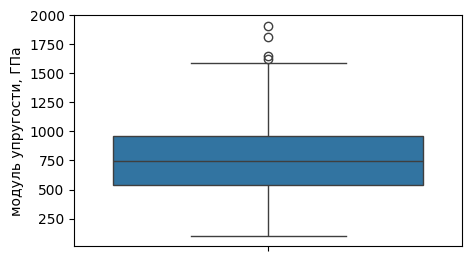

In [117]:
plt.figure(figsize=(5, 3))
sns.boxplot(df_new2['модуль упругости, ГПа'])
plt.show()

In [118]:
df_new2[(df_new2["модуль упругости, ГПа"] <= lower_bound_upr) | (df_new2["модуль упругости, ГПа"] >= upper_bound_upr)]

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
11,1990.000000,1628.000000,129.000000,21.250000,1010.000000,300.000000,0,9.000000,47.000000,2.877358,78.000000,2000.000000
592,1949.031040,1911.536477,98.380762,19.447283,426.917622,256.522741,1,8.100387,54.843521,1.487419,75.573334,2814.321842
741,2020.005530,1649.415706,59.496316,16.779820,450.292990,90.402162,1,5.167153,49.196801,1.562514,67.887882,2175.645308
770,2007.727318,1815.865170,117.162722,23.688583,679.581560,179.939702,1,5.108723,55.226873,2.796648,79.518613,3103.000733


In [119]:
df_new2 = df_new2.drop(index=[11, 139, 592, 741, 770])

***ВЫБРОСЫ. КОЛИЧЕСТВО ОТВЕРДИТЕЛЯ.***

In [120]:
kol_otv_25 = df_new2["Количество отвердителя, м.%"].quantile(0.25)
kol_otv_75 = df_new2["Количество отвердителя, м.%"].quantile(0.75)

In [121]:
kol_otv = kol_otv_75 - kol_otv_25
kol_otv

37.01777667468343

In [122]:
lower_bound_otv = kol_otv_25 - 1.5 * kol_otv
upper_bound_otv = kol_otv_75 + 1.5 * kol_otv

In [123]:
lower_bound_otv

37.07114740075693

In [124]:
upper_bound_otv

185.14225409949066

In [125]:
df_new2[(df_new2["Количество отвердителя, м.%"] <= lower_bound_otv) | (df_new2["Количество отвердителя, м.%"] >= upper_bound_otv)]

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
0,2030.000000,738.736842,30.000000,22.267857,210.000000,220.000000,0,4.000000,57.000000,1.857143,70.000000,3000.000000
208,1938.949730,1014.173382,35.620904,24.829676,379.246075,164.547578,0,3.906225,50.741725,4.706654,74.445896,3063.025225
257,1959.011062,916.441601,17.740275,21.965568,508.912477,245.687212,0,5.721782,71.172863,3.027269,74.278829,3165.165801
412,1951.714931,918.042452,198.953207,26.811285,962.345527,178.357504,0,9.582822,55.278331,2.885855,73.662132,1379.568514
448,1963.974220,741.037038,33.624187,25.259070,792.107217,196.716930,0,5.475548,62.185719,2.435946,79.878657,2414.230597
495,2033.684615,775.055033,192.851702,20.007524,692.366086,306.093242,0,8.717044,69.800068,2.132552,70.054191,1950.973300
535,2132.378269,1261.785969,29.956150,24.382152,297.672136,308.972215,0,4.786794,53.248529,3.694056,74.515560,3575.590285
800,1847.077400,826.699855,188.049898,24.336103,694.083948,386.903431,1,6.412291,60.878525,3.109085,71.758106,1494.253452
819,2057.184549,238.828509,35.599697,20.305610,338.284487,200.705096,1,2.419549,55.326406,2.887238,75.967077,2776.209642
867,2082.620963,594.402727,190.318107,22.222827,372.333716,190.875279,1,8.888343,51.811905,4.748316,76.501452,3197.831498


In [126]:
df_new2 = df_new2.drop(index=[0, 208, 257, 412, 448, 495, 535, 800, 819, 867, 958])

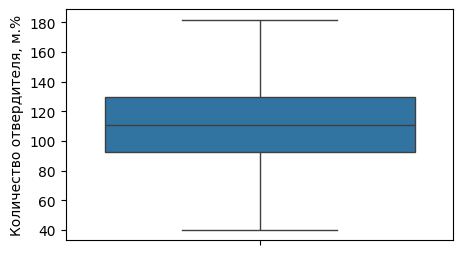

In [127]:
plt.figure(figsize=(5, 3))
sns.boxplot(df_new2['Количество отвердителя, м.%'])
plt.show()

***ВЫБРОСЫ. ЭПОКСИДЫ***

In [128]:
epoks_gr_25 = df_new2["Содержание эпоксидных групп,%_2"].quantile(0.25)
epoks_gr_75 = df_new2["Содержание эпоксидных групп,%_2"].quantile(0.75)
epoks_gr = epoks_gr_75 - epoks_gr_25
lower_bound_epoks = epoks_gr_25 - 1.5 * epoks_gr
upper_bound_epoks = epoks_gr_75 + 1.5 * epoks_gr

In [129]:
df_new2[(df_new2["Содержание эпоксидных групп,%_2"] <= lower_bound_epoks) | (df_new2["Содержание эпоксидных групп,%_2"] >= upper_bound_epoks)]


,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
2,2030.000000,738.736842,49.900000,33.000000,210.000000,220.000000,0,4.000000,70.000000,1.857143,70.000000,3000.000000
298,2129.059629,589.782966,70.760954,14.254985,676.050552,92.307158,0,4.650262,63.956692,2.385109,76.472254,2529.945213


In [130]:
df_new2 = df_new2.drop(index=[2, 298])

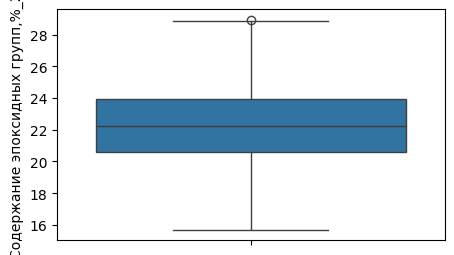

In [131]:
plt.figure(figsize=(5, 3))
sns.boxplot(df_new2['Содержание эпоксидных групп,%_2'])
plt.show()

***ВЫБРОСЫ. Поверхностная плотность***

In [132]:
pov_pl_25 = df_new2["Поверхностная плотность, г/м2"].quantile(0.25)
pov_pl_75 = df_new2["Поверхностная плотность, г/м2"].quantile(0.75)
pov_pl = pov_pl_75 - pov_pl_25
lower_bound_pov_pl = pov_pl_25 - 1.5 * pov_pl
upper_bound_pov_pl = pov_pl_75 + 1.5 * pov_pl

In [133]:
df_new2[(df_new2["Поверхностная плотность, г/м2"] <= lower_bound_pov_pl) | (df_new2["Поверхностная плотность, г/м2"] >= upper_bound_pov_pl)]

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
460,2040.229870,536.663039,168.536509,19.417348,1288.691844,246.666401,0,9.475986,80.810107,3.096419,69.367179,1831.362292
692,2014.825483,667.332585,110.860146,21.797640,1399.542362,270.684615,1,8.503453,64.597786,3.695486,73.194617,3583.506884
697,1985.995757,588.908070,55.357623,22.055959,1291.340115,149.376123,1,7.615874,64.619238,1.827105,71.886116,2675.143157
718,1978.962659,372.566673,94.803958,23.056813,1391.032409,288.794810,1,4.845661,50.952915,3.883264,73.639983,2649.351334


In [134]:
df_new2 = df_new2.drop(index=[460, 692, 697, 718])

***ВЫБРОСЫ. ПОТРЕБЛЕНИЕ СМОЛЫ***

In [135]:
potr_smol_25 = df_new2["Потребление смолы, г/м2"].quantile(0.25)
potr_smol_75 = df_new2["Потребление смолы, г/м2"].quantile(0.75)
potr_smol = potr_smol_75 - potr_smol_25
lower_bound_potr_smol = potr_smol_25 - 1.5 * potr_smol
upper_bound_potr_smol = potr_smol_75 + 1.5 * potr_smol

In [136]:
df_new2[(df_new2["Потребление смолы, г/м2"] <= lower_bound_potr_smol) | (df_new2["Потребление смолы, г/м2"] >= upper_bound_potr_smol)]

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
100,2207.773481,696.149163,94.187613,23.562885,384.629393,402.163809,0,4.512825,46.775469,3.565855,68.784473,2596.685251
119,2038.728453,1104.753631,137.296385,20.398797,430.107822,383.663401,0,6.232319,77.140355,2.967268,69.252305,1706.261148
471,1923.649471,559.380732,109.219575,22.397008,452.025051,41.048278,0,10.081489,45.167995,3.656437,72.216524,2596.398221
541,1900.447879,778.356422,43.454556,25.437709,409.637966,63.685698,1,8.015561,70.035767,2.694356,73.709184,1727.395939
593,1797.648234,807.064161,120.065258,23.882251,383.261885,378.756879,1,4.519954,63.838886,3.307697,68.901283,2794.677292
707,2039.531678,1180.837797,117.906407,21.847896,520.031451,64.524180,1,9.252672,57.881818,2.809643,72.968271,2761.393722


In [137]:
df_new2 = df_new2.drop(index=[100, 119, 471, 541, 593, 707])

***ВЫБРОСЫ. ШАГ НАШИВКИ***

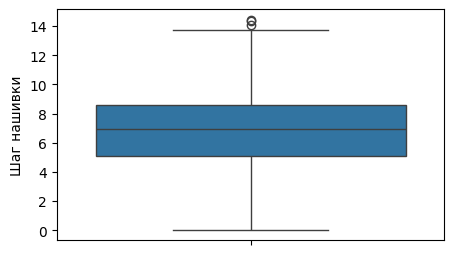

In [138]:
plt.figure(figsize=(5, 3))
sns.boxplot(df_new2['Шаг нашивки'])
plt.show()

In [139]:
shag_nash_25 = df_new2["Шаг нашивки"].quantile(0.25)
shag_nash_75 = df_new2["Шаг нашивки"].quantile(0.75)
shag_nash = shag_nash_75 - shag_nash_25
lower_bound_shag_nash = shag_nash_25 - 1.5 * shag_nash
upper_bound_shag_nash = shag_nash_75 + 1.5 * shag_nash

In [140]:
df_new2[(df_new2["Шаг нашивки"] <= lower_bound_shag_nash) | (df_new2["Шаг нашивки"] >= upper_bound_shag_nash)]

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
114,2019.552159,1063.742781,146.035949,23.695911,822.311634,194.238670,0,14.051383,74.469002,3.153404,70.648753,2700.665341
392,2064.644261,933.835041,106.898372,22.272400,950.685384,330.728529,0,14.440522,47.713362,2.496519,74.886839,2694.586007
529,1830.332164,471.506958,133.312208,19.918813,241.219283,304.184250,0,14.376451,46.452598,3.916135,73.519831,2826.723248


In [141]:
df_new2 = df_new2.drop(index=[114, 392, 529])

***ВЫБРОСЫ. ПЛОТНОСТЬ НАШИВКИ***

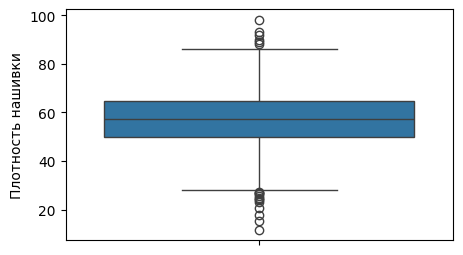

In [142]:
plt.figure(figsize=(5, 3))
sns.boxplot(df_new2['Плотность нашивки'])
plt.show()

In [143]:
plot_nash_25 = df_new2["Плотность нашивки"].quantile(0.25)
plot_nash_75 = df_new2["Плотность нашивки"].quantile(0.75)
plot_nash = plot_nash_75 - plot_nash_25
lower_bound_plot_nash = plot_nash_25 - 1.5 * plot_nash
upper_bound_plot_nash = plot_nash_75 + 1.5 * plot_nash

In [ ]:
df_new2[(df_new2["Плотность нашивки"] <= lower_bound_plot_nash) | (df_new2["Плотность нашивки"] >= upper_bound_plot_nash)]

In [145]:
df_new2 = df_new2.drop(index=[74, 117, 140, 165, 193, 233, 279, 309, 348, 369, 383, 389, 438, 461, 465, 466, 481, 496, 508])


array([[<Axes: title={'center': 'Поверхностная плотность, г/м2'}>,
        <Axes: title={'center': 'Потребление смолы, г/м2'}>]],
      dtype=object)

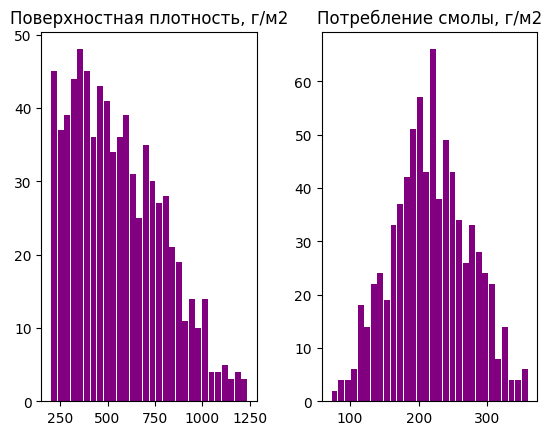

In [146]:
#ГИСТОГРАММЫ ВЫХОДНЫХ ПАРАМЕТРОВ
df_new2.hist(column=['Поверхностная плотность, г/м2', 'Потребление смолы, г/м2'], bins=30, grid=False, rwidth= .9, color='purple')

array([[<Axes: title={'center': 'Плотность нашивки'}>,
        <Axes: title={'center': 'Угол нашивки, град'}>],
       [<Axes: title={'center': 'Шаг нашивки'}>, <Axes: >]], dtype=object)

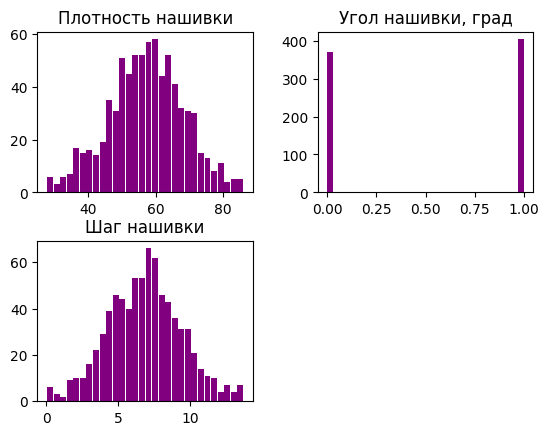

In [149]:
df_new2.hist(column=['Плотность нашивки',	'Угол нашивки, град',	'Шаг нашивки'], bins=30, grid=False, rwidth= .9, color='purple')

***РЕГРЕССИОННЫЙ АНАЛИЗ. МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ***

In [3]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from google.colab import files

In [4]:
uploaded = files.upload()

Saving VKR_new.csv to VKR_new.csv


In [5]:
#ЗАГРУЖАЮ ПРЕДОБРАБОТАННЫЙ ДАТАСЕТ
vkr = pd.read_csv('VKR_new.csv')
vkr.head(3)

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
0,2030.0,738.736842,50.00,23.750000,210.0,220.0,0,4.0,60.0,1.857143,70.0,3000.0
1,2030.0,738.736842,129.00,21.250000,210.0,220.0,0,5.0,47.0,1.857143,70.0,3000.0
2,2030.0,753.000000,111.86,22.267857,210.0,220.0,0,5.0,57.0,2.771331,70.0,3000.0


ГИСТОГРАММА КАЖДОГО ПРИЗНАКА ДО НОРМАЛИЗЦИИ

array([[<Axes: title={'center': 'Плотность, кг/м3'}>,
        <Axes: title={'center': 'модуль упругости, ГПа'}>,
        <Axes: title={'center': 'Количество отвердителя, м.%'}>],
       [<Axes: title={'center': 'Содержание эпоксидных групп,%_2'}>,
        <Axes: title={'center': 'Поверхностная плотность, г/м2'}>,
        <Axes: title={'center': 'Потребление смолы, г/м2'}>],
       [<Axes: title={'center': 'Шаг нашивки'}>,
        <Axes: title={'center': 'Плотность нашивки'}>, <Axes: >]],
      dtype=object)

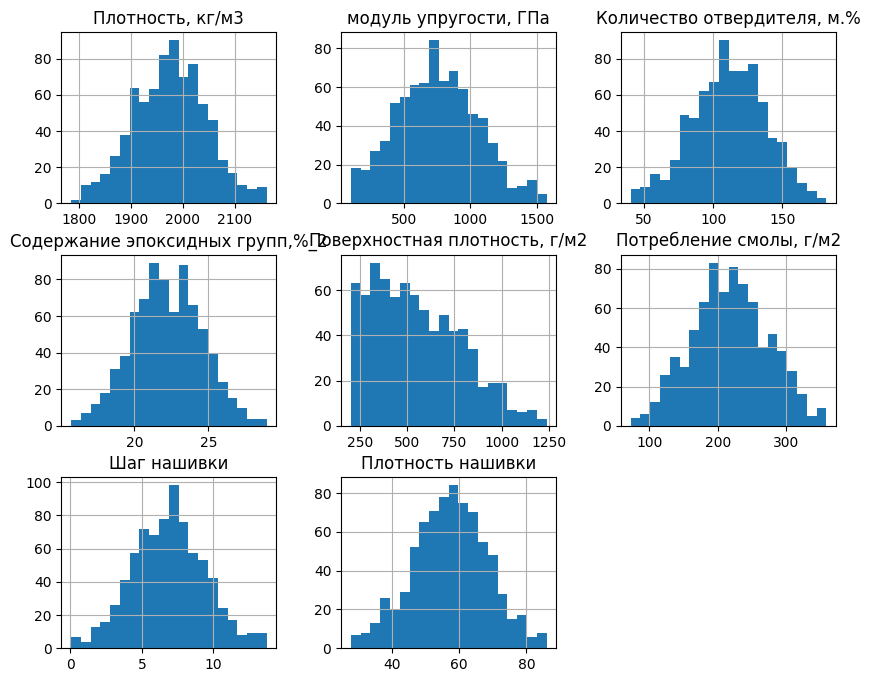

In [12]:
vkr[['Плотность, кг/м3',	'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',	'Шаг нашивки',	'Плотность нашивки']].hist(bins=20, figsize=(10, 8))

array([[<Axes: title={'center': 'Модуль упругости при растяжении, ГПа'}>,
        <Axes: title={'center': 'Прочность при растяжении, МПа'}>]],
      dtype=object)

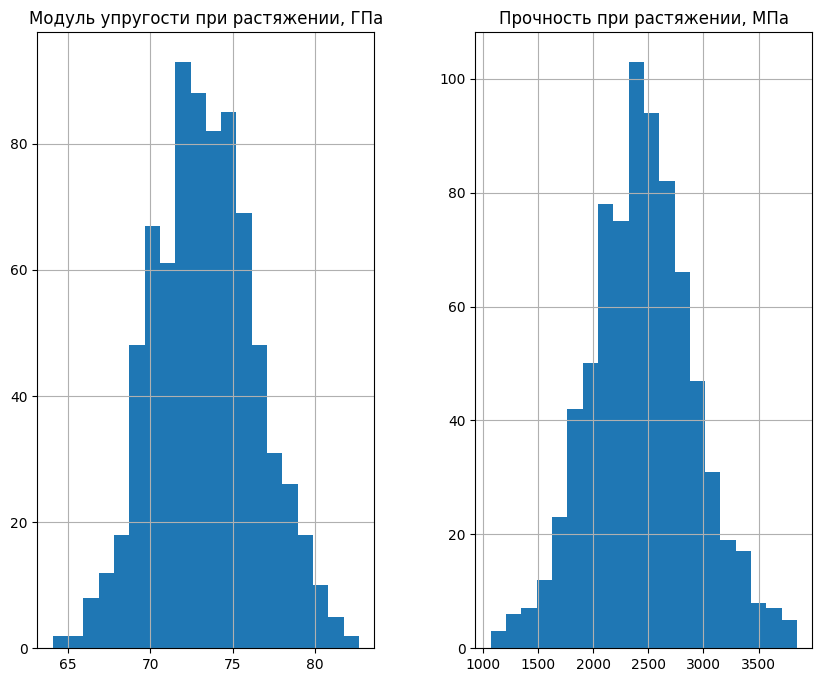

In [13]:
vkr[['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']].hist(bins=20, figsize=(10, 8))

In [14]:
#максимальные значения до нормализации
vkr[['Плотность, кг/м3',	'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',	'Шаг нашивки',	'Плотность нашивки', 'Соотношение матрица-наполнитель', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']].max()

Плотность, кг/м3                        2161.565216
модуль упругости, ГПа                   1572.096042
Количество отвердителя, м.%              181.828448
Содержание эпоксидных групп,%_2           28.955094
Поверхностная плотность, г/м2           1238.476416
Потребление смолы, г/м2                  359.052220
Шаг нашивки                               13.732404
Плотность нашивки                         85.987174
Соотношение матрица-наполнитель            5.455566
Модуль упругости при растяжении, ГПа      82.682051
Прочность при растяжении, МПа           3848.436732
dtype: float64

In [15]:
#минимальные значения признаков до нормализации
vkr[['Плотность, кг/м3',	'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',	'Шаг нашивки',	'Плотность нашивки', 'Соотношение матрица-наполнитель', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']].mean()

Плотность, кг/м3                        1975.591023
модуль упругости, ГПа                    754.539875
Количество отвердителя, м.%              111.243560
Содержание эпоксидных групп,%_2           22.221288
Поверхностная плотность, г/м2            554.503214
Потребление смолы, г/м2                  218.103599
Шаг нашивки                                6.873946
Плотность нашивки                         57.330727
Соотношение матрица-наполнитель            2.944422
Модуль упругости при растяжении, ГПа      73.356429
Прочность при растяжении, МПа           2454.144769
dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

***НОРМАЛИЗАЦИЯ***

In [17]:
vkr_norm = minmax_scaler.fit_transform(np.array(vkr[['Плотность, кг/м3',	'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',	'Угол нашивки, град', 'Шаг нашивки',	'Плотность нашивки', 'Соотношение матрица-наполнитель', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]))

In [18]:
vkr_df = pd.DataFrame(data=vkr_norm, columns = ['Плотность, кг/м3',	'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки',	'Плотность нашивки', 'Соотношение матрица-наполнитель', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])

In [19]:
vkr_df[['Плотность, кг/м3',	'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',	'Шаг нашивки',	'Плотность нашивки', 'Соотношение матрица-наполнитель', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']].max()

Плотность, кг/м3                        1.0
модуль упругости, ГПа                   1.0
Количество отвердителя, м.%             1.0
Содержание эпоксидных групп,%_2         1.0
Поверхностная плотность, г/м2           1.0
Потребление смолы, г/м2                 1.0
Шаг нашивки                             1.0
Плотность нашивки                       1.0
Соотношение матрица-наполнитель         1.0
Модуль упругости при растяжении, ГПа    1.0
Прочность при растяжении, МПа           1.0
dtype: float64

In [20]:
vkr_df[['Плотность, кг/м3',	'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',	'Шаг нашивки',	'Плотность нашивки', 'Соотношение матрица-наполнитель', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']].min()

Плотность, кг/м3                        0.0
модуль упругости, ГПа                   0.0
Количество отвердителя, м.%             0.0
Содержание эпоксидных групп,%_2         0.0
Поверхностная плотность, г/м2           0.0
Потребление смолы, г/м2                 0.0
Шаг нашивки                             0.0
Плотность нашивки                       0.0
Соотношение матрица-наполнитель         0.0
Модуль упругости при растяжении, ГПа    0.0
Прочность при растяжении, МПа           0.0
dtype: float64

In [21]:
vkr_df[['Плотность, кг/м3',	'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',	'Шаг нашивки',	'Плотность нашивки', 'Соотношение матрица-наполнитель', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']].mean()

Плотность, кг/м3                        0.506808
модуль упругости, ГПа                   0.443610
Количество отвердителя, м.%             0.501250
Содержание эпоксидных групп,%_2         0.492141
Поверхностная плотность, г/м2           0.340752
Потребление смолы, г/м2                 0.508069
Шаг нашивки                             0.499191
Плотность нашивки                       0.506734
Соотношение матрица-наполнитель         0.504330
Модуль упругости при растяжении, ГПа    0.499376
Прочность при растяжении, МПа           0.497971
dtype: float64

ГИСТОГРАММЫ ПОСЛЕ НОРМАЛИЗАЦИИ

array([[<Axes: title={'center': 'Плотность, кг/м3'}>,
        <Axes: title={'center': 'модуль упругости, ГПа'}>,
        <Axes: title={'center': 'Количество отвердителя, м.%'}>],
       [<Axes: title={'center': 'Содержание эпоксидных групп,%_2'}>,
        <Axes: title={'center': 'Поверхностная плотность, г/м2'}>,
        <Axes: title={'center': 'Потребление смолы, г/м2'}>],
       [<Axes: title={'center': 'Шаг нашивки'}>,
        <Axes: title={'center': 'Плотность нашивки'}>, <Axes: >]],
      dtype=object)

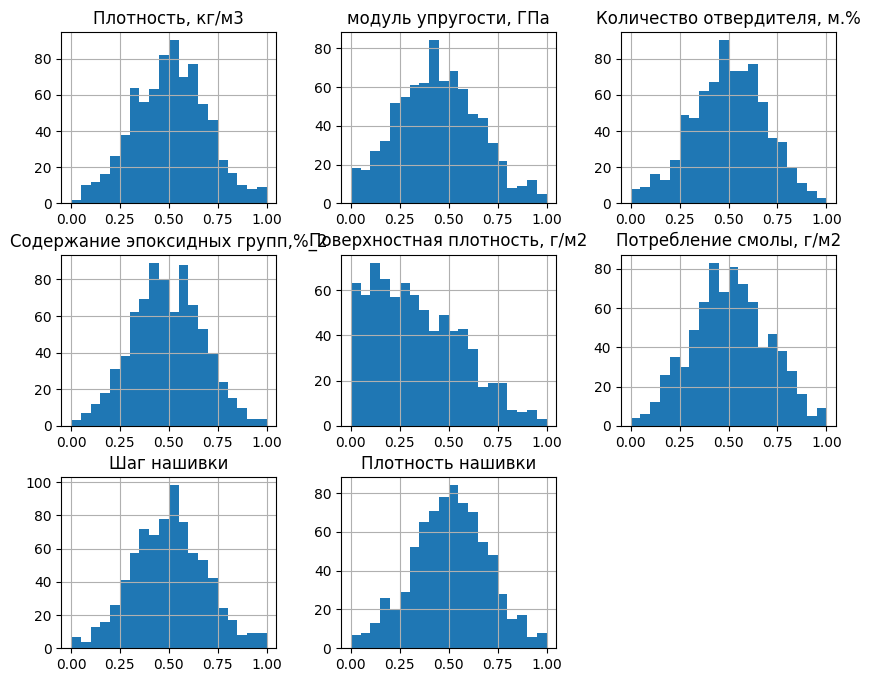

In [163]:
X[['Плотность, кг/м3',	'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',	'Шаг нашивки',	'Плотность нашивки']].hist(bins=20, figsize=(10, 8))

array([[<Axes: title={'center': 'Модуль упругости при растяжении, ГПа'}>,
        <Axes: title={'center': 'Прочность при растяжении, МПа'}>]],
      dtype=object)

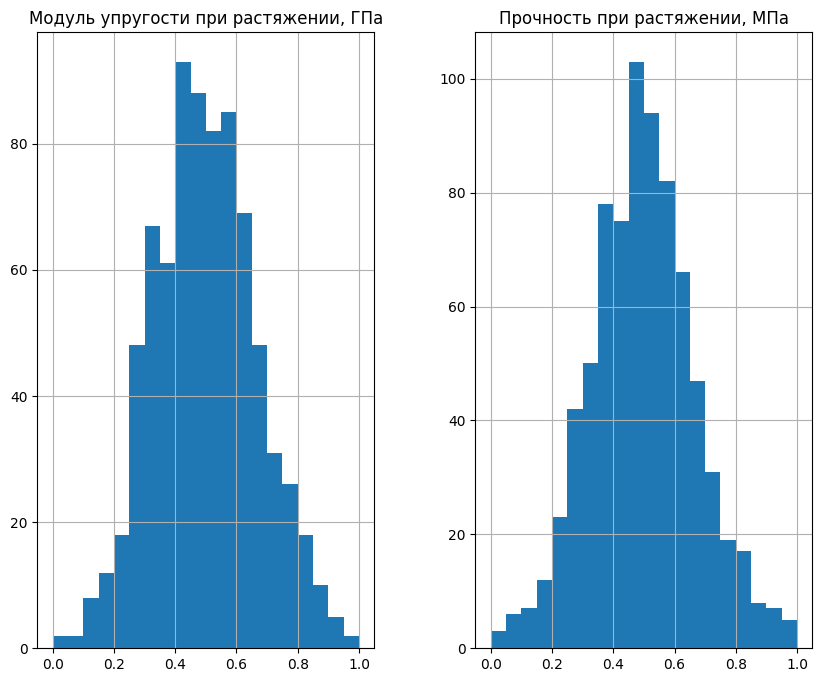

In [172]:
Y[['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']].hist(bins=20, figsize=(10, 8))

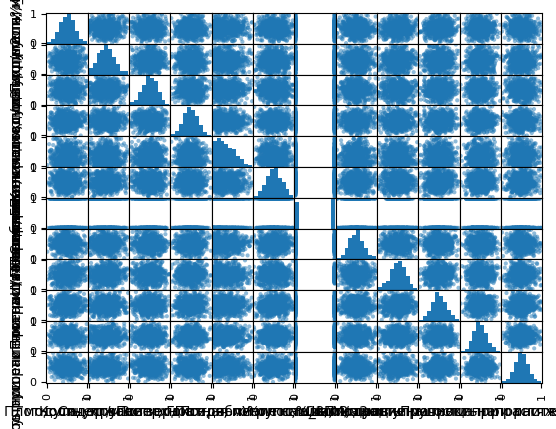

In [24]:
scatter_matrix(vkr_df)
pyplot.show()

КОРРЕЛЯЦИЯ ПОСЛЕ ПРЕДОБРАБОТКИ И НОРМАЛИЗЦИИ

<Axes: title={'center': 'Корреляция свойств по Пирсону'}>

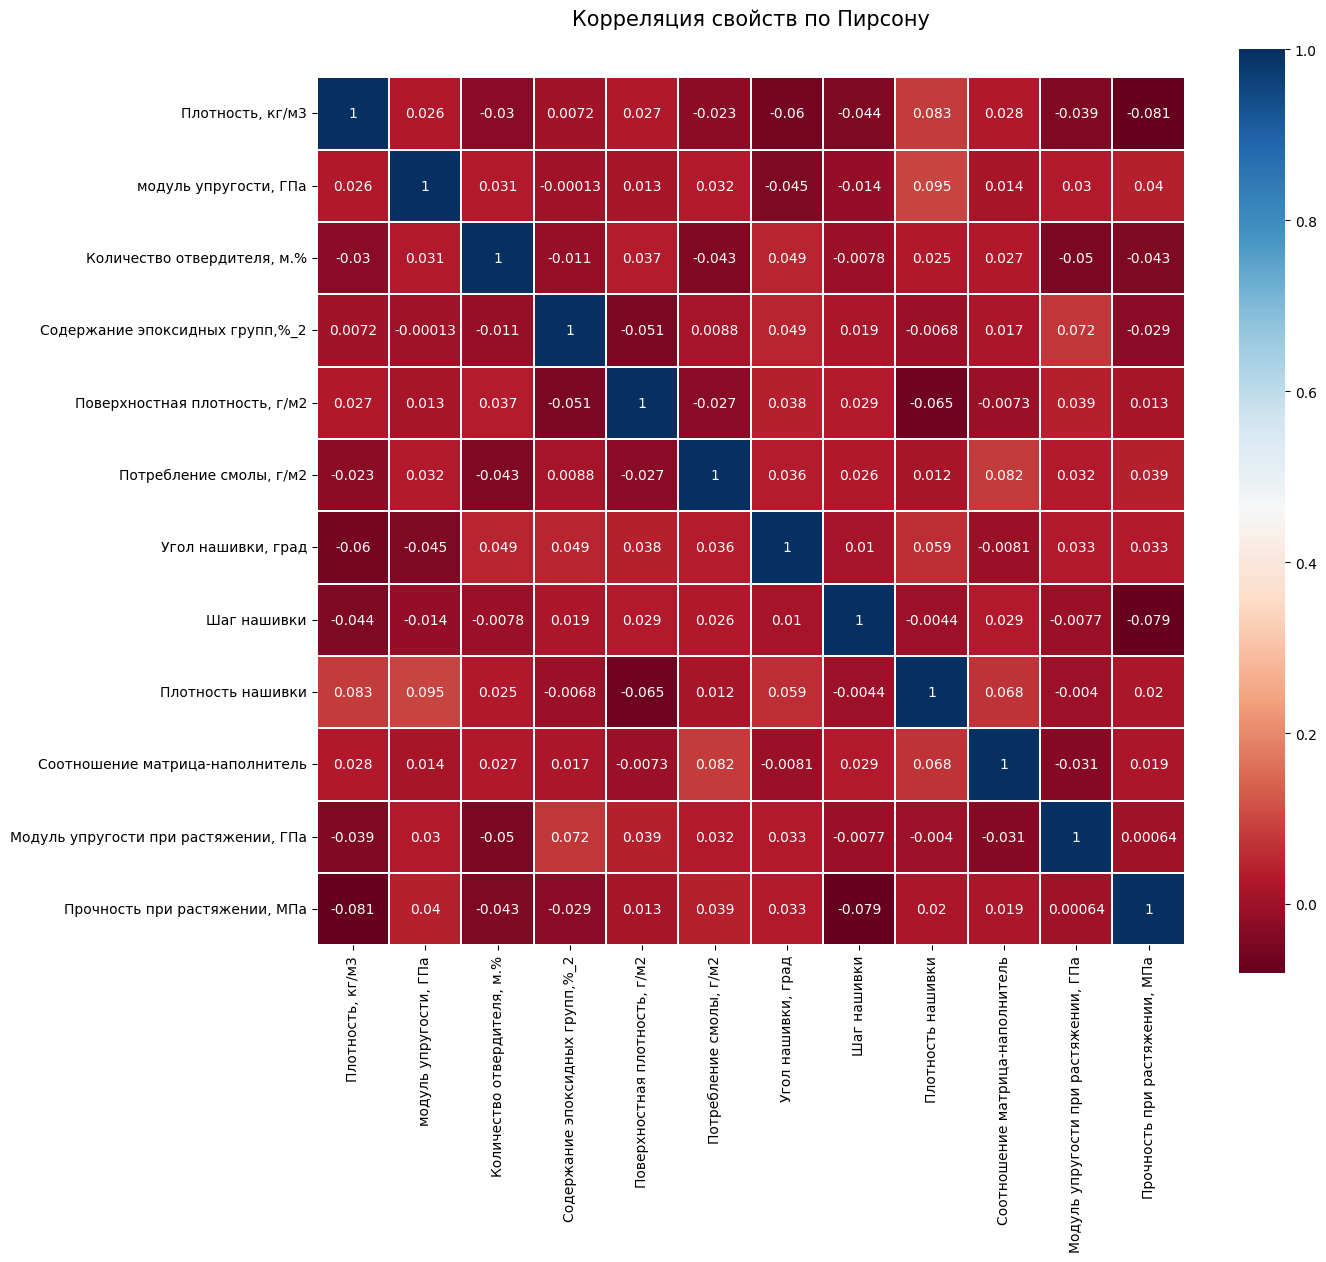

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Корреляция свойств по Пирсону', y=1.05, size=15)
sns.heatmap(vkr_df.corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

ОПРЕДЕЛЯЮ X и Y

In [26]:
features_x = [
    "Плотность, кг/м3",
    "модуль упругости, ГПа",
    "Количество отвердителя, м.%",
    "Содержание эпоксидных групп,%_2",
    "Поверхностная плотность, г/м2",
    "Потребление смолы, г/м2",
    "Угол нашивки, град",
    "Шаг нашивки",
    "Плотность нашивки",
    "Соотношение матрица-наполнитель"
    ]
X = vkr_df.copy()

X = X.loc[:, features_x]

In [28]:
features_y = [
    "Модуль упругости при растяжении, ГПа",
    "Прочность при растяжении, МПа",
]
Y = vkr_df.copy()
Y = Y.loc[:, features_y]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6, test_size=0.4, random_state=10)

***РЕГРЕССИЯ ДЕРЕВО РЕШЕНИЙ***

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import  GridSearchCV

In [31]:
DT_reg = DecisionTreeRegressor()


In [34]:
DT_reg.fit(X_train, Y_train)

DecisionTreeRegressor()

In [35]:
y_pred_train = DT_reg.predict(X_train)
y_pred_test = DT_reg.predict(X_test)
r2_score(Y_train, y_pred_train)


1.0

In [36]:
r2_score(Y_test, y_pred_test) #R2 без гиперпараметров

-0.9492345797247456

In [37]:
#НАСТРОЙКА ПАРАМЕТРОВ
param_grid = {
    #'criterion':["squared_error", "friedman_mse","absolute_error", "poisson"],
    'max_depth':[1, 2, 3, 4, 5],
    'max_features':[1, 2, 3, 4, 5],
    'min_samples_split':[2, 3, 4],
    'min_samples_leaf':[1, 3, 5],
  #  'splitter':["best", "random"]
}
DT = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = DT, param_grid=param_grid, cv=10, verbose=1, scoring='r2', n_jobs=2)
grid_search.fit(X_train, Y_train)


Fitting 10 folds for each of 225 candidates, totalling 2250 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=2,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4]},
             scoring='r2', verbose=1)

In [38]:
grid_search.best_params_

{'max_depth': 1,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [39]:
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

In [108]:
print('MAE_train:', mean_absolute_error(Y_train, y_pred_train))
print('MSE_train:', mean_squared_error(Y_train, y_pred_train))


MAE_train: 0.19696245990496086
MSE_train: 0.041147084873797285


In [109]:
print('MAE_test:', mean_absolute_error(Y_test, y_pred_test))
print('MSE_test:', mean_squared_error(Y_test, y_pred_test))


MAE_test: 0.1944303658350767
MSE_test: 0.040206121054082423


In [110]:
#R2 с гиперпараметрами
print('R^2 Score:%.3f' %r2_score(Y_train, y_pred_train))
print('R^2 Score:%.3f' %r2_score(Y_test, y_pred_test))

R^2 Score:-0.461
R^2 Score:-0.373


In [43]:
#строю график
Y_DT = pd.DataFrame(data=y_pred_test, columns = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])
Y_mod_pred = Y_DT['Модуль упругости при растяжении, ГПа']
Y_proch_pred = Y_DT['Прочность при растяжении, МПа']
X_modul_vkr = vkr_df['Содержание эпоксидных групп,%_2']
X_proch_vkr = vkr_df['Плотность, кг/м3']
Y_modul_vkr = vkr_df['Модуль упругости при растяжении, ГПа']
Y_proch_vkr = vkr_df['Прочность при растяжении, МПа']
X_modul_test = X_test['Содержание эпоксидных групп,%_2']
X_proch_test = X_test['Плотность, кг/м3']

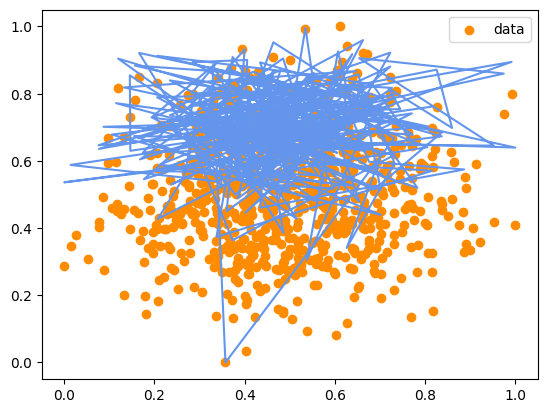

In [44]:
plt.figure()
plt.scatter(X_modul_vkr, Y_modul_vkr, c="darkorange", label="data")
plt.plot(X_modul_test, Y_mod_pred, color="cornflowerblue")
plt.legend()
plt.show()


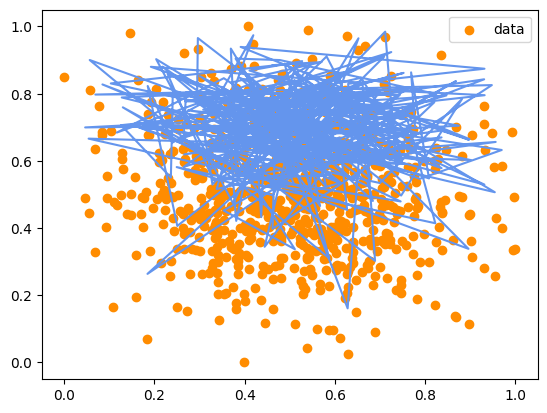

In [45]:
plt.figure()
plt.scatter(X_proch_vkr, Y_proch_vkr, c="darkorange", label="data")
plt.plot(X_proch_test, Y_proch_pred, color="cornflowerblue")
plt.legend()
plt.show()

***РЕГРЕССИЯ К-БЛИЖАЙШИХ СОСЕДЕЙ***

In [114]:
 X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=50)

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [115]:
#НАСТРОЙКА ПАРАМЕТРОВ
param_grid_knn = {"n_neighbors": [1, 2, 3, 4, 5, 10, 15, 100, 200, 240]}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_knn, cv=10)
grid_search_knn.fit(X_train_knn, Y_train_knn)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 100, 200, 240]})

In [116]:
grid_search_knn.best_params_

{'n_neighbors': 240}

In [117]:
y_pred_train_knn = grid_search_knn.predict(X_train_knn)
y_pred_test_knn = grid_search_knn.predict(X_test_knn)

In [118]:
#R2 с гиперпараметрами
print('R^2 Score:%.3f' %r2_score(Y_train_knn, y_pred_train_knn))
print('R^2 Score:%.3f' %r2_score(Y_test_knn, y_pred_test_knn))


R^2 Score:-0.000
R^2 Score:-0.003


In [119]:
print('MAE:', mean_absolute_error(Y_train_knn, y_pred_train_knn))
print('MSE:', mean_squared_error(Y_train_knn, y_pred_train_knn))


MAE: 0.13423102703692358
MSE: 0.028221414513267977


In [120]:
print('MAE:', mean_absolute_error(Y_test_knn, y_pred_test_knn))
print('MSE:', mean_squared_error(Y_test_knn, y_pred_test_knn))


MAE: 0.13594728047561971
MSE: 0.02964586943370935


In [121]:
#строю график
Y_KNN = pd.DataFrame(data=y_pred_test_knn, columns = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])
Y_mod_pred_knn = Y_KNN['Модуль упругости при растяжении, ГПа']
Y_proch_pred_knn = Y_KNN['Прочность при растяжении, МПа']
X_modul_vkr = vkr['Содержание эпоксидных групп,%_2']
X_proch_vkr = vkr['Шаг нашивки']
Y_modul_vkr = vkr['Модуль упругости при растяжении, ГПа']
Y_proch_vkr = vkr['Прочность при растяжении, МПа']
X_modul_test_knn = X_test_knn['Содержание эпоксидных групп,%_2']
X_proch_test_knn = X_test_knn['Шаг нашивки']

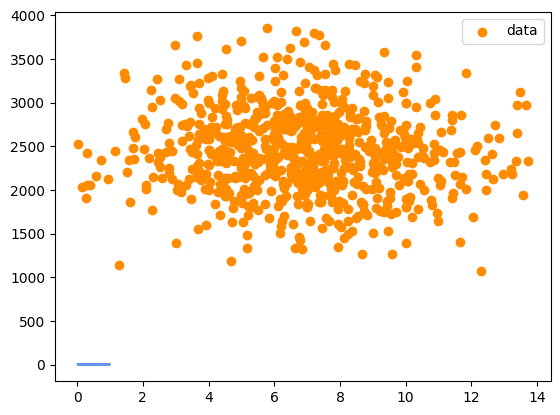

In [122]:
plt.figure()
plt.scatter(X_proch_vkr, Y_proch_vkr, c="darkorange", label="data")
plt.plot(X_proch_test_knn, Y_proch_pred_knn, color="cornflowerblue")
plt.legend()
plt.show()

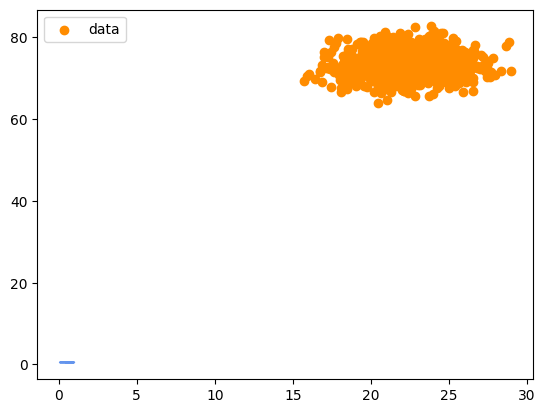

In [123]:
plt.figure()
plt.scatter(X_modul_vkr, Y_modul_vkr, c="darkorange", label="data")
plt.plot(X_modul_test_knn, Y_mod_pred_knn, color="cornflowerblue")
plt.legend()
plt.show()

***RANDOMFORESTREGRESSOR***

In [124]:
 X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=50)

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
rf = RandomForestRegressor()
#НАСТРОЙКА ПАРАМЕТРОВ
param_grid_rf = [
    {'criterion':['squared_error', 'friedman_mse'],
     'max_depth':[2, 5, 10],
     'max_leaf_nodes':[2, 5, 10],

}]
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=10, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf.fit(X_train_rf, Y_train_rf)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [2, 5, 10],
                          'max_leaf_nodes': [2, 5, 10]}],
             scoring='neg_mean_squared_error', verbose=1)

In [126]:
grid_search_rf.best_params_

{'criterion': 'squared_error', 'max_depth': 2, 'max_leaf_nodes': 2}

In [127]:
y_pred_train_rf = grid_search_rf.predict(X_train_rf)
y_pred_test_rf = grid_search_rf.predict(X_test_rf)

In [128]:
#R2 с гиперпараметрами
print('R^2 Score:%.3f' %r2_score(Y_train_rf, y_pred_train_rf))
print('R^2 Score:%.3f' %r2_score(Y_test_rf, y_pred_test_rf))

R^2 Score:0.018
R^2 Score:0.002


In [129]:
print('MAE:', mean_absolute_error(Y_train_rf, y_pred_train_rf))
print('MSE:', mean_squared_error(Y_train_rf, y_pred_train_rf))


MAE: 0.13305458679721754
MSE: 0.02769514895872749


In [131]:
print('MAE:', mean_absolute_error(Y_test_rf, y_pred_test_rf))
print('MSE:', mean_squared_error(Y_test_rf, y_pred_test_rf))

MAE: 0.1355360807258213
MSE: 0.029489964297868647


In [72]:
#строю график
Y_RF = pd.DataFrame(data=y_pred_test_rf, columns = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])
Y_mod_pred_rf = Y_RF['Модуль упругости при растяжении, ГПа']
Y_proch_pred_rf = Y_RF['Прочность при растяжении, МПа']
X_modul_vkr = vkr_df['Содержание эпоксидных групп,%_2']
X_proch_vkr = vkr_df['Плотность, кг/м3']
Y_modul_vkr = vkr_df['Модуль упругости при растяжении, ГПа']
Y_proch_vkr = vkr_df['Прочность при растяжении, МПа']
X_modul_test_rf = X_test_rf['Содержание эпоксидных групп,%_2']
X_proch_test_rf = X_test_rf['Плотность, кг/м3']

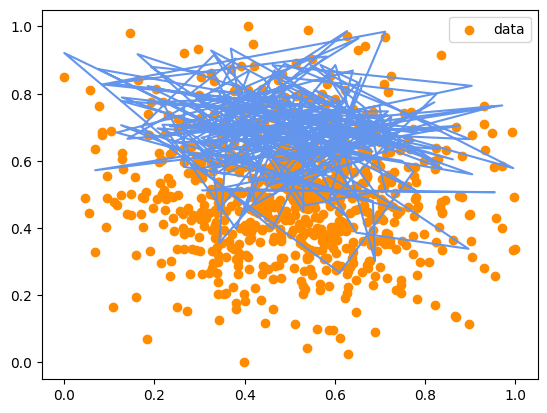

In [73]:
plt.figure()
plt.scatter(X_proch_vkr, Y_proch_vkr, c="darkorange", label="data")
plt.plot(X_proch_test_rf, Y_proch_pred_rf, color="cornflowerblue")
plt.legend()
plt.show()

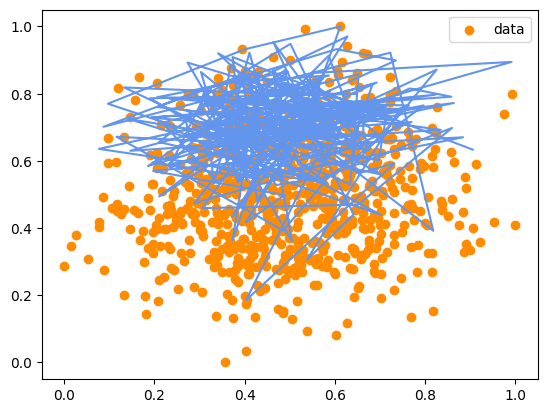

In [74]:
plt.figure()
plt.scatter(X_modul_vkr, Y_modul_vkr, c="darkorange", label="data")
plt.plot(X_modul_test_rf, Y_mod_pred_rf, color="cornflowerblue")
plt.legend()
plt.show()

**МОДЕЛЬ ДЛЯ ПРИЛОЖЕНИЯ FLASK**

In [75]:
features_x_FL = [
       "Содержание эпоксидных групп,%_2",
    ]
X_FL = vkr_df.copy()

X_FL = X_FL.loc[:, features_x_FL]

features_y_FL = [
    "Модуль упругости при растяжении, ГПа",
   ]
Y_FL = vkr_df.copy()
Y_FL = Y_FL.loc[:, features_y_FL]

In [76]:
 X_train_FL, X_test_FL, Y_train_FL, Y_test_FL = train_test_split(X_FL, Y_FL, train_size=0.7, test_size=0.3, random_state=50)


In [77]:
rf_FL = RandomForestRegressor(criterion='friedman_mse', max_depth=5, max_leaf_nodes=2)
rf_FL.fit(X_train_FL, Y_train_FL)

<ipython-input-77-8b64d08bbb1a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_FL.fit(X_train_FL, Y_train_FL)


RandomForestRegressor(criterion='friedman_mse', max_depth=5, max_leaf_nodes=2)

In [78]:
y_pred_train_FL = rf_FL.predict(X_train_FL)
y_pred_test_FL = rf_FL.predict(X_test_FL)

In [79]:
#R2 с гиперпараметрами
print('R^2 Score:%.3f' %r2_score(Y_train_FL, y_pred_train_FL))
print('R^2 Score:%.3f' %r2_score(Y_test_FL, y_pred_test_FL))

R^2 Score:0.017
R^2 Score:0.005


In [80]:
import pickle

In [265]:
pickle.dump(rf_FL, open('rf_FL.pkl', 'wb'))

***НЕЙРОННАЯ СЕТЬ. ПРЕДСКАЗАНИЕ СООТНОШЕНИЯ МАТРИЦА НАПОЛНИТЕЛЬ***

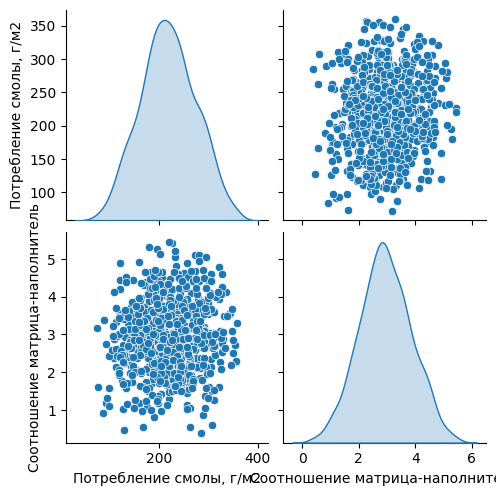

In [81]:
#СМОТРЮ ЗАВИСИМОСТЬ НА ГРАФИКЕ ПРОГНОЗИРУЕМОГО ЗНАЧЕНИЯ И ВЫБРАННОГО ПРИЗНАКА
sns.pairplot(vkr[['Потребление смолы, г/м2', 'Соотношение матрица-наполнитель']], diag_kind='kde')

<Axes: ylabel='Density'>

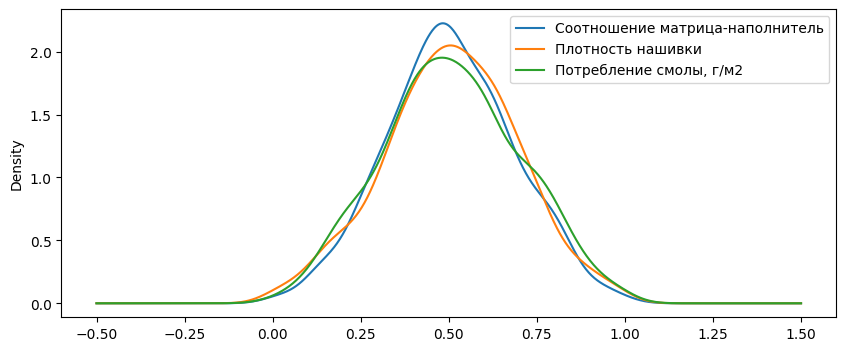

In [133]:
vkr_df[['Соотношение матрица-наполнитель', 'Плотность нашивки', 'Потребление смолы, г/м2']].plot.kde(figsize = (10, 4))

In [216]:
import torch
from torch.autograd import  Variable

import matplotlib.pyplot as plt

from IPython.display import IFrame
%matplotlib inline
import imageio

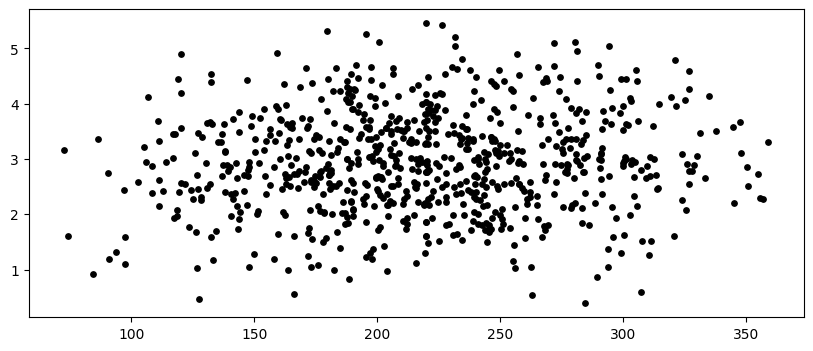

In [217]:
x_NC = vkr['Потребление смолы, г/м2']
y_NC = vkr['Соотношение матрица-наполнитель']
plt.figure(figsize=(10, 4))
plt.scatter(x_NC, y_NC, color = 'black', s=15)


ДЕЛАЮ ВЫБОРКУ И ПРЕДОБРАБОТАННОГО НАБОРА ДАННЫХ

In [218]:
feat_x = [
    #"Плотность, кг/м3",
    #"модуль упругости, ГПа",
    #"Количество отвердителя, м.%",
    #"Содержание эпоксидных групп,%_2",
    #"Температура вспышки, С_2",
    #"Поверхностная плотность, г/м2",
    "Потребление смолы, г/м2",
    #"Угол нашивки, град",
    #"Шаг нашивки",
    #"Плотность нашивки",
    "Соотношение матрица-наполнитель"
    ]
x = vkr.copy()

x = x.loc[:, feat_x]


ИМПОРТ БИБЛИОТЕК

In [219]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

РАЗДЕЛЯЮ ДАННЫЕ НА TRAIN И TEST

In [220]:
train_df = x.sample(frac=0.7, random_state=10)
test_df = x.drop(train_df.index)

In [209]:
train_df.tail

<bound method NDFrame.tail of      Потребление смолы, г/м2  Соотношение матрица-наполнитель
596               213.035369                         3.299063
615               323.865845                         2.266528
593               197.786450                         3.059071
322               210.710993                         3.501555
191               199.083547                         4.112223
..                       ...                              ...
538               241.140588                         2.010614
291               210.296112                         3.378918
685               236.868483                         2.433911
189               215.557148                         2.472986
247               197.826130                         1.197596

[542 rows x 2 columns]>

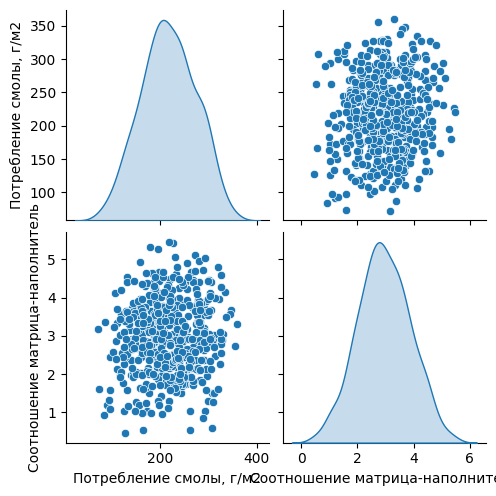

In [210]:
train_df['Соотношение матрица-наполнитель'] = train_df['Соотношение матрица-наполнитель'].fillna(pd.NA)
sns.pairplot(train_df[["Потребление смолы, г/м2", "Соотношение матрица-наполнитель"]].astype(float), diag_kind='kde')

In [221]:
train_features = train_df.copy()
test_features = test_df.copy()
#ОПРЕДЕЛЕНИЕ МЕТКИ ДЛЯ ПРОГНОЗИРОВАНИЯ
train_labels = train_features.pop('Соотношение матрица-наполнитель')
test_labels = test_features.pop('Соотношение матрица-наполнитель')

ОПРЕДЕЛЕНИЕ СЛОЯ НОРМАЛИЗАЦИИ

In [258]:
normalizer = tf.keras.layers.Normalization(axis=-1)

ОБУЧЕНИЕ НОРМАЛИЗАТОРА

In [259]:
normalizer.adapt(np.array(train_features))

ЗНАЧЕНИЕ МАТОЖИДАНИЯ И ДИСПЕРСИИ

In [224]:
print(normalizer.mean.numpy())

[[217.6835]]


НОРМАЛИЗОВАННЫЕ ВХОДНЫЕ ДАННЫЕ

In [225]:
first = np.array(train_features)


with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())



First example: [[213.04]
 [323.87]
 [197.79]
 [210.71]
 [199.08]
 [187.93]
 [292.74]
 [168.44]
 [234.93]
 [210.33]
 [180.55]
 [256.78]
 [244.64]
 [174.37]
 [136.55]
 [226.14]
 [243.83]
 [167.67]
 [197.4 ]
 [321.58]
 [232.53]
 [208.17]
 [265.1 ]
 [200.58]
 [284.1 ]
 [311.05]
 [299.11]
 [159.76]
 [244.72]
 [161.75]
 [219.32]
 [170.39]
 [175.02]
 [198.74]
 [159.37]
 [181.4 ]
 [156.26]
 [189.23]
 [200.41]
 [254.55]
 [187.08]
 [290.13]
 [220.73]
 [301.76]
 [190.27]
 [283.18]
 [281.27]
 [163.7 ]
 [172.97]
 [212.11]
 [245.54]
 [257.77]
 [211.53]
 [254.57]
 [289.83]
 [187.85]
 [232.43]
 [242.42]
 [229.18]
 [276.82]
 [182.36]
 [278.62]
 [140.5 ]
 [271.91]
 [149.08]
 [200.34]
 [247.62]
 [190.35]
 [285.42]
 [137.06]
 [167.17]
 [303.46]
 [200.3 ]
 [138.24]
 [179.67]
 [161.21]
 [291.13]
 [330.21]
 [198.24]
 [192.46]
 [291.96]
 [271.9 ]
 [220.69]
 [291.28]
 [141.42]
 [216.74]
 [277.6 ]
 [220.85]
 [184.91]
 [174.86]
 [276.54]
 [194.52]
 [296.9 ]
 [159.65]
 [183.27]
 [121.83]
 [204.52]
 [126.97]
 [307

Сначала создадим массив, состоящий из элементов атрибута 'Потребление смолы, г/м2'. Затем создадим экземпляр `tf.keras.layers.Normalization` и обучим его в соответствие с данными 'Потребление смолы'

In [260]:
potr_smol = np.array(train_features['Потребление смолы, г/м2'])

potr_smol_normalizer = layers.Normalization(input_shape=[1,], axis=None)
potr_smol_normalizer.adapt(potr_smol)

ПРОЦЕДУРА ОБУЧЕНИЯ МОДЕЛИ


In [261]:
potr_smol_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

ОБУЧЕНИЕ МОДЕЛИ НА 100 ЭПОХАХ

In [228]:
%%time
history = potr_smol_model.fit(
    train_features['Потребление смолы, г/м2'],
    train_labels,
    epochs=100,
    # Отключаем отчеты по процессу.
    verbose=0,
    # Используем 20% обучающих данных для валидации.
    validation_split = 0.2)

CPU times: user 6.55 s, sys: 274 ms, total: 6.82 s
Wall time: 10.7 s


In [263]:
potr_smol_model = tf.keras.Sequential([
    potr_smol_normalizer,
    layers.Dense(units=1)
])

potr_smol_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliz  (None, 1)                 3         
 ation)                                                          
                                                                 
 dense_48 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


СТАТИСТИКИ ОБУЧЕНИЯ

In [264]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.728610,0.778471,95
96,0.730241,0.776725,96
97,0.728766,0.778145,97
98,0.732665,0.774741,98
99,0.732221,0.772518,99


In [245]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Ошибка обучения')
  plt.plot(history.history['val_loss'], label='Ошибка валидации')
  plt.ylim([0, 10])
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка прогноза по [MPG]')
  plt.legend()
  plt.grid(True)

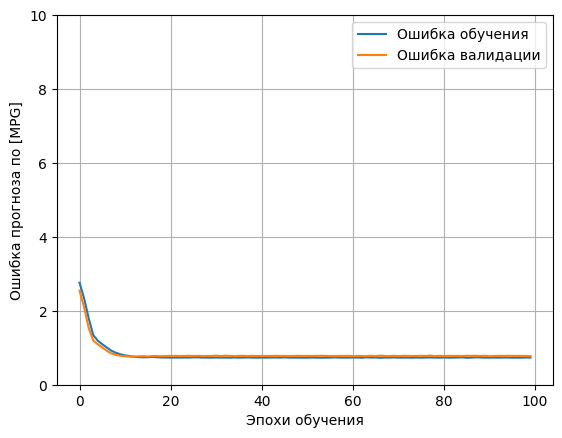

In [246]:
plot_loss(history)

СОХРАНЕНИЕ РЕЗУЛЬТАТОВ В ТЕСТОВОМ НАБОРЕ

In [230]:
test_results = {}

test_results['potr_smol_model'] = potr_smol_model.evaluate(
    test_features['Потребление смолы, г/м2'],
    test_labels, verbose=0)

In [247]:
x = tf.linspace(0.0, 250, 251)
y = potr_smol_model.predict(x)

8/8 [==============================] - 0s 4ms/step


In [248]:
def plot_potr_smol(x, y):
  plt.scatter(train_features['Потребление смолы, г/м2'], train_labels, label='Истинные значения')
  plt.plot(x, y, color='k', label='Прогнозы')
  plt.xlabel('Потребление смолы, г/м2')
  plt.ylabel('Соотношение матрица-наполнитель')
  plt.legend()

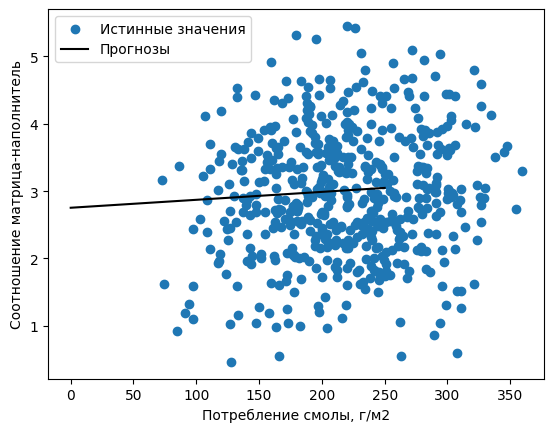

In [249]:
plot_potr_smol(x, y)

In [251]:
pd.DataFrame(test_results, index=['Mean absolute error [Соотношение матрица-наполнитель]']).T

,Mean absolute error [Соотношение матрица-наполнитель]
potr_smol_model,0.691005
potr_smol_dnn_model,0.707998


In [ ]:
ВЫПОЛНЕНИЕ ПРОГНОЗА

8/8 [==============================] - 0s 4ms/step


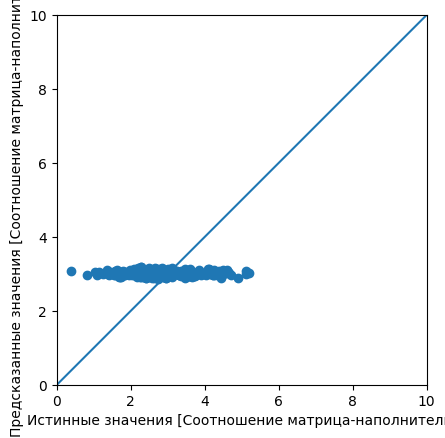

In [256]:
test_predictions = potr_smol_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('Истинные значения [Соотношение матрица-наполнитель]')
plt.ylabel('Предсказанные значения [Соотношение матрица-наполнитель]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

***РАЗРАБОТКА КОНСОЛЬНОГО ПРИЛОЖЕНИЯ***

In [ ]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# проверка строки на число
def my_is_digit(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

# получаем от пользователя ввод данных
def get_prediction(model):
  inp_val = get_input_values()
  # далее делаем прогноз и возвращаем его
  return model.predict(inp_val)

#здесь будем забирать данные ввода
def get_input_values():
  inp_arg = ['Содержание эпоксидных групп,%_2']
  inp_val = []
  for arg in inp_arg:
    while True:
      user_arg = input(f'Введите {arg} ')
      if my_is_digit(user_arg):
        inp_val.append(float(user_arg))
        break
      else:
        print('Введено не числовое значение')
  return inp_val

#get_input_values()

def for_load_model():

  with open('/content/rf_FL.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
  return loaded_model

def main():
  # Какие либо действия которые нужно выполнить до основного цикла
  model = for_load_model()
  #
  print('Приложение')
  print('Опции, например, нажмите один для прогноза, нажмите два для выхода')
  while True:
    f = input('Введите 1 для прогноза, 2 для выхода ')

    if f == '1':
      #прогноз
      pred = get_prediction(model)
      print(f'результат прогноза Модуль упругости при расстяжении: {pred}')
    elif f == '2':
      break
    else:
      print('Неверный ввод')
  print('Работа завершена')

main()

Приложение
Опции, например, нажмите один для прогноза, нажмите два для выхода
